In [1]:
from matplotlib import pyplot as plt
from skimage import morphology
from scipy.spatial import distance_matrix
import numpy as np
from itertools import product
from scipy.ndimage.morphology import distance_transform_cdt
from urban_growth.simulator import *
%matplotlib inline

In [9]:
# Params

## Initial Configuration
L = 100
rho = .44
blur = 2

## Rural/Urban Size Threshold
T = 50

## Dynamical Parameters, not assuming that these are good ones. 

truncation = None

pars = {'gamma_r' : 1.5,     # rural settlement more diffuse than urban
        'gamma_u' : 3.0,      
        'alpha_r' : 20.0,       
        'alpha_u' : 20.0,
        'beta_r'  : -10.0,      # low background rates
        'beta_u'  : -10.0,
        'truncation' : truncation}

geo = np.ones((L, L))

for i in np.arange(0, L):
    geo[:,i] = 1.0*i / L 

# Initialize the Model

In [10]:
m = simulator(geo = geo)
m.set_M0(L = L, density = rho, blur = blur)

# Classify Existing Settlements

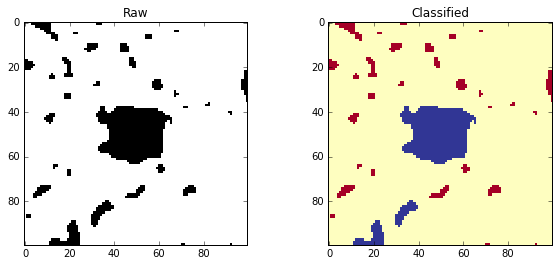

In [11]:
fig = plt.figure(figsize = (10, 4))

ax1 = fig.add_subplot(121)
ax1.imshow(m.get_M0(), interpolation = 'nearest', cmap = 'Greys')
plt.title('Raw')

ax2 = fig.add_subplot(122)
ax2.imshow(m.settlement_type_matrix(T), interpolation = 'nearest', cmap = 'RdYlBu')
plt.title('Classified')

# Probability Density for New Settlements

The code below computes settlement probabilities across all unoccupied sites under the parameters specified above. It is thus the foundation of the "forward" step. White areas are already settled. Warmer colors indicate higher likelihood to be settled. The plots below are made using Phil's revision of Ema's model (i.e. the logistic-based "Model 1"), as this is faster to compute. 

Note that this computation is a bit costly in terms of storing the distances: for $L = 200$ ($N = L^2 = 40,000$ pixels), it takes about ~30 seconds on Phil's personal machine. 

In [ ]:
n_iters = 5

density_pars = {'thresh'     : T,
                'pars'       : pars,
                'model'      : model_1,
                'use_geo'    : True,
                'truncation' : truncation}

densities = m.density(**density_pars)
M = m.dynamics(n_iters = n_iters, **density_pars)

Now let's take a look at the model structure. In the first three plots below, we visualize the probability of settlement in the next time step divided out according to rural, urban, and total settlement probabilities. 

In the final plot, we visualize the growth of the system over multiple time steps, and use the color to keep track of when each settlement arose. 

There is a linearly decreasing east-west geographic mask that discourages settlement the farther west you go. 

In [ ]:
density_pars = {'vmin'         : 0,
                'vmax'         : 1,
               'interpolation' : 'nearest',
               'cmap'          : 'viridis'}

fig = plt.figure(figsize = (10, 8))
ax1 = fig.add_subplot(221)
im = ax1.imshow(densities[0], **density_pars)
plt.colorbar(im)
plt.title('Initial Rural Settlement Probability')

ax2 = fig.add_subplot(222)
im = ax2.imshow(densities[1],**density_pars)
plt.colorbar(im)
plt.title('Initial Urban Settlement Probability')


ax3 = fig.add_subplot(223)
im = ax3.imshow(densities[0] + densities[1], **density_pars)
plt.colorbar(im)
plt.title('Initial Settlement Probability')


ax4 = fig.add_subplot(224)
im = ax4.imshow(M, interpolation = 'nearest')
plt.colorbar(im)

plt.title('Growth over Ten Time Steps')

Let's compare that last plot to another run with highly localized growth.

In [ ]:
pars = {'gamma_r' :  2.0,     # rural settlement more diffuse than urban
        'gamma_u' :  3.0,      
        'alpha_r' :  20.0,       
        'alpha_u' :  20.0,
        'beta_r'  : -10.0,   # low background rates
        'beta_u'  : -10.0, 
        'truncation' : truncation}

m2 = simulator(geo = geo)
m2.set_M0(M0 = m.get_M0())

density_pars = {'thresh' : T,
                'pars'   : pars,
                'model'  : model_1,
                'use_geo' : True,
                'truncation' : truncation}

M2 = m2.dynamics(n_iters = n_iters, **density_pars)

In [ ]:
fig = plt.figure(figsize = (10, 4))

ax1 = fig.add_subplot(121)
im = ax1.imshow(M, interpolation = 'nearest')
plt.colorbar(im)
plt.title('Less Localized')

ax2 = fig.add_subplot(122)
im = ax2.imshow(M2, interpolation = 'nearest')
plt.colorbar(im)
plt.title('More Localized')